Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud

Mount with google drive to import the dataset

In [2]:
from google.colab import drive
drive.mount("/content/gdrive",force_remount=True)

Mounted at /content/gdrive


Import a dataset from google drive

In [3]:
df=pd.read_csv("/content/gdrive/My Drive/CYBERDOSTI INTERNSHIP/WEEK 1/Reviews.csv",header=0)

Visualising data:

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Dropping null values if any:

In [5]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis = 0 , inplace = True)
print(df.shape)

(568454, 10)
True
(568411, 10)


Dropping duplicates:

In [6]:
df.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True)
print(df.shape)
df.head(10)

(393661, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


Visualise total count of score:

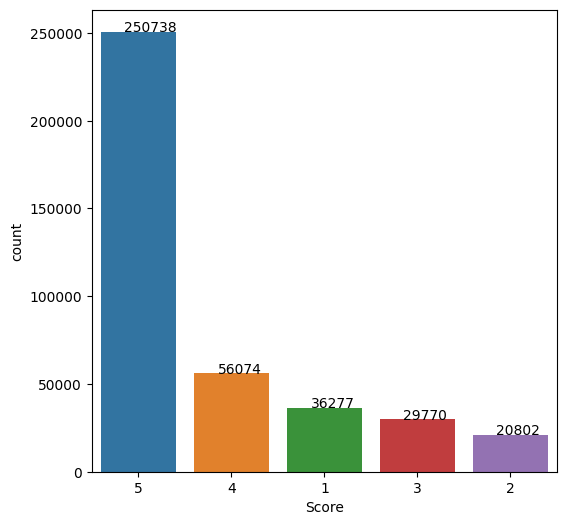

In [7]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x=df["Score"],  data=df, order = df["Score"].value_counts().index )
for p, label in zip(ax.patches, df["Score"].value_counts()):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

Group by product Id:

In [8]:
df.groupby('ProductId').count()
df_products = df.groupby('ProductId').filter(lambda x: len(x) >= 400)
df_product_groups = df_products.groupby('ProductId')

#Count of products and groups
print(len(df_products))
print(len(df_product_groups))

12034
23


Plot the score product-wise:

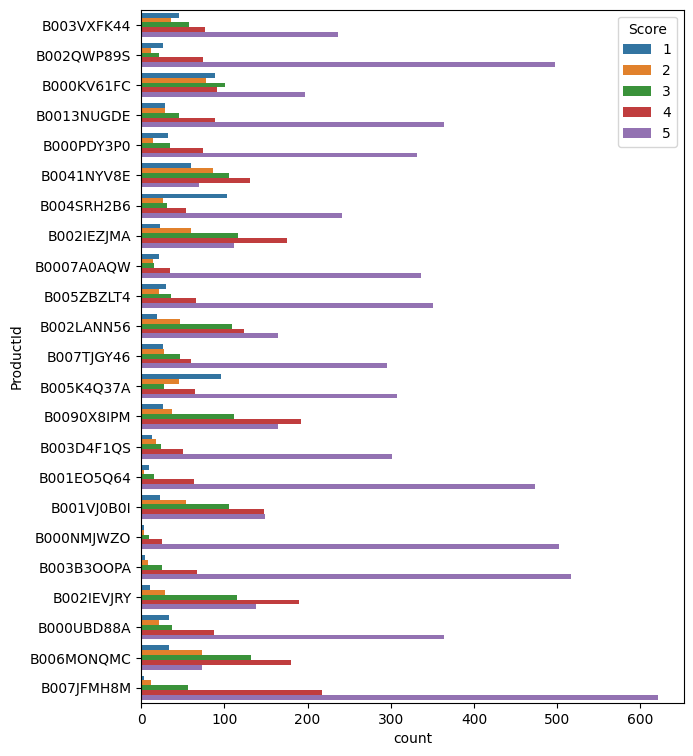

In [9]:
plt.figure(figsize=(7,9))
sns.countplot(y="ProductId",  hue="Score", data=df_products);

Group by user ID who gave more than 100 reviews:

In [10]:
df.groupby('UserId').count()

df_users = df.groupby('UserId').filter(lambda x: len(x) >= 100)
df_userGroup = df_users.groupby('UserId')
print("Number of Users:"+ str(len(df_userGroup)))
df_products = df_users.groupby('ProductId')
print("Number of products:"+ str(len(df_products)))

Number of Users:18
Number of products:2507


Plotting users as per their given score ratings:

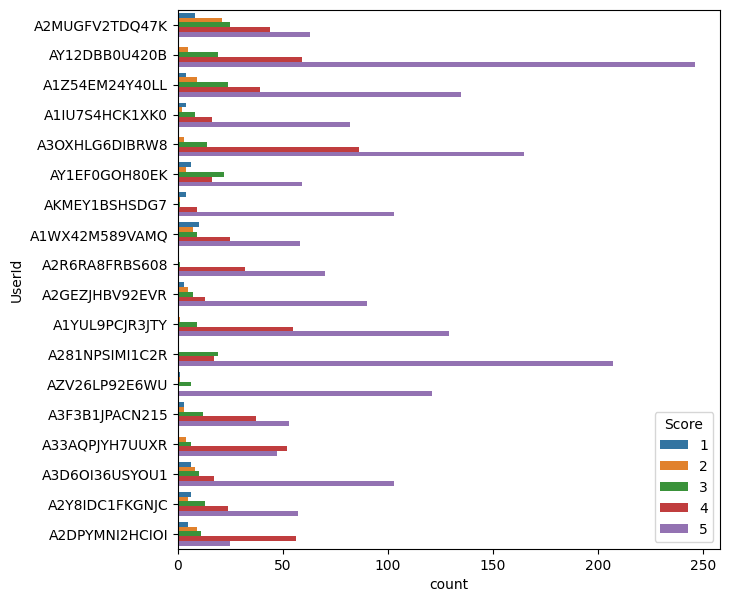

In [11]:
plt.figure(figsize=(7,7))
sns.countplot(y="UserId",  hue="Score", data=df_users);

**Now let's see which are the words used mostly in positive reviews and the most used words in negative reviews.**


For this import library for data cleaning:




In [12]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

Make functions for removal of stopwords, lemmatizing and cleaning text:



In [14]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize( text.lower() )
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)


def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)

def clean_text(text ):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr])

    return text2.lower()

Segregate positive and negative reviews:

In [15]:
mask = (df["Score"] == 1) | (df["Score"] == 2)
df_rating1 = df[mask]
mask = (df["Score"]==4) | (df["Score"]==5) | (df["Score"]==3)
df_rating2 = df[mask]
print(len(df_rating1))
print(len(df_rating2))

57079
336582


Cleaning the text of stopwords, lemmatizing, and cleaning punctuations:




In [16]:
df_rating1['Text'] = df_rating1['Text'].apply(clean_text)
df_rating1['Text'] = df_rating1['Text'].apply(remove_Stopwords)
df_rating1['Text'] = df_rating1['Text'].apply(lemmatize_text)


df_rating2['Text'] = df_rating2['Text'].apply(clean_text)
df_rating2['Text'] = df_rating2['Text'].apply(remove_Stopwords)
df_rating2['Text'] = df_rating2['Text'].apply(lemmatize_text)

df_rating1['Num_words_text'] = df_rating1['Text'].apply(lambda x:len(str(x).split()))
df_rating2['Num_words_text'] = df_rating2['Text'].apply(lambda x:len(str(x).split()))

<ipython-input-16-b278f0b03d07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating1['Text'] = df_rating1['Text'].apply(clean_text)
<ipython-input-16-b278f0b03d07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating1['Text'] = df_rating1['Text'].apply(remove_Stopwords)
<ipython-input-16-b278f0b03d07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

WordCloud view of negative reviews:



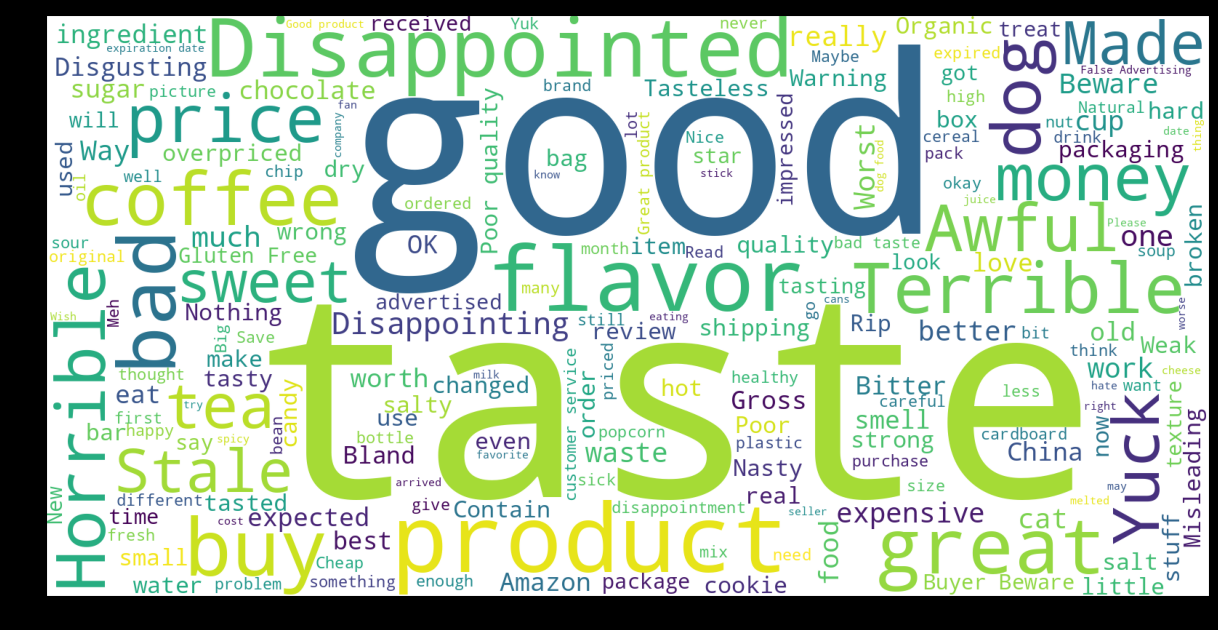

In [17]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating1['Summary'].tolist()))
plt.figure( figsize=(15,15), facecolor='k')
plt.imshow(wordcloud)

WordCloud view of positive reviews:

(-0.5, 1599.5, 799.5, -0.5)

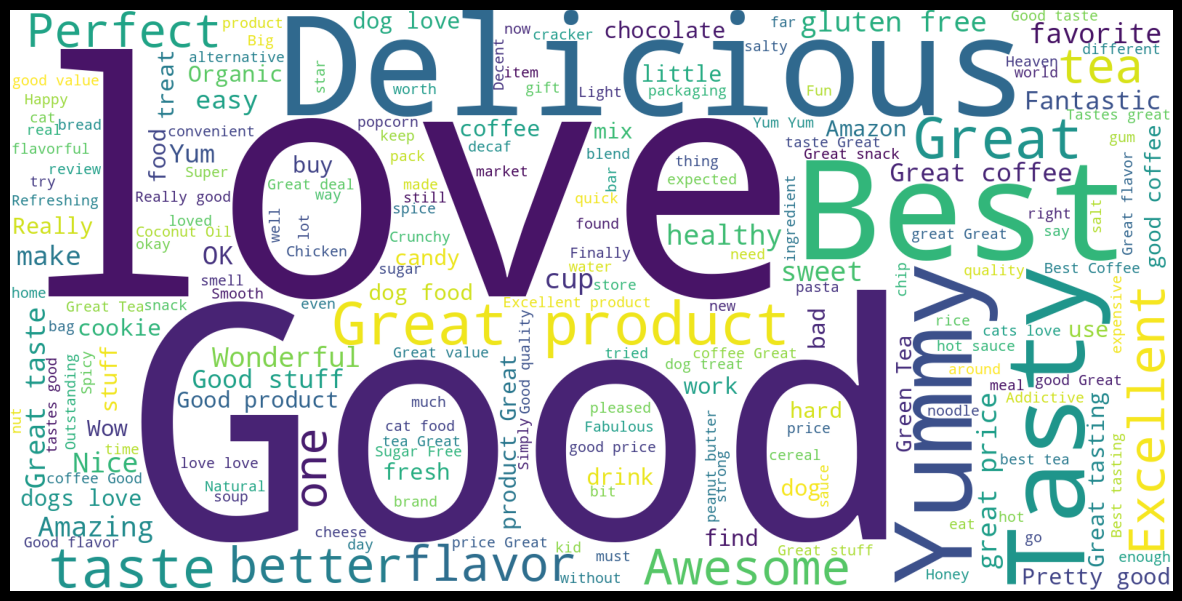

In [18]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating2['Summary'].tolist()))
plt.figure( figsize=(15,15), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
